<a href="https://colab.research.google.com/github/NehaKoppikar/BTDSS6DL/blob/master/Test/DL_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from contextlib import suppress
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import random
import shutil  
import urllib.request
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
import zipfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with suppress(FileExistsError):
    os.mkdir('data')

source_dir = os.path.join('data', 'UCMerced_LandUse', 'Images')

# Download the zipped dataset from http://vision.ucmerced.edu/datasets/landuse.html 
if not os.path.isdir(source_dir):
    with ZipFile('/content/drive/My Drive/Datasets/UCMerced_LandUse.zip') as z:
        z.extractall(path='data')

In [0]:
train_path ='/content/data/UCMerced_LandUse/Images'
os.mkdir('/content/data/UCMerced_LandUse/test')
os.mkdir('/content/data/UCMerced_LandUse/validation')
validation_path = '/content/data/UCMerced_LandUse/validation'
test_path  = '/content/data/UCMerced_LandUse/test'

train_folders = os.listdir(train_path)
validation_folders = os.listdir(validation_path)
test_folders = os.listdir(test_path)

In [14]:
for folder in train_folders:
    if folder != ".DS_Store":
        current_path = os.path.join(train_path,folder)
        files = os.listdir(current_path)
        files_to_move = files[-15:]
        v_destination = (os.path.join(validation_path, folder))
        t_destination = (os.path.join(test_path, folder))

        file_counter = 0
        for file in files_to_move:
            if file_counter <= 10:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(v_destination):
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(v_destination)
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
            else:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(t_destination):
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(t_destination)
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1              

/content/data/UCMerced_LandUse/Images/agricultural/agricultural36.tif
/content/data/UCMerced_LandUse/Images/agricultural/agricultural36.tif moved to /content/data/UCMerced_LandUse/validation/agricultural
/content/data/UCMerced_LandUse/Images/agricultural/agricultural32.tif
/content/data/UCMerced_LandUse/Images/agricultural/agricultural32.tif moved to /content/data/UCMerced_LandUse/validation/agricultural
/content/data/UCMerced_LandUse/Images/agricultural/agricultural18.tif
/content/data/UCMerced_LandUse/Images/agricultural/agricultural18.tif moved to /content/data/UCMerced_LandUse/validation/agricultural
/content/data/UCMerced_LandUse/Images/agricultural/agricultural79.tif
/content/data/UCMerced_LandUse/Images/agricultural/agricultural79.tif moved to /content/data/UCMerced_LandUse/validation/agricultural
/content/data/UCMerced_LandUse/Images/agricultural/agricultural88.tif
/content/data/UCMerced_LandUse/Images/agricultural/agricultural88.tif moved to /content/data/UCMerced_LandUse/vali

In [16]:
# Path to the train folder
original_test = '/content/data/UCMerced_LandUse/test'
categories = os.listdir(original_test)
files_list = []
categories_list = []
for category in categories:
   category_path = os.path.join(original_test,category)

   files = os.listdir(category_path)
   for file_name in files:
     files_list.append(str(category) + "/" + file_name)
     categories_list.append(category)

print(len(files_list))
print(len(categories_list))
data_test = pd.DataFrame({'filename':files_list,'label':categories_list})

84
84


In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    directory=r"/content/data/UCMerced_LandUse/Images",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = test_datagen.flow_from_directory(
    directory=r"/content/data/UCMerced_LandUse/validation",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory="/content/data/UCMerced_LandUse/test",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 1785 images belonging to 21 classes.
Found 231 images belonging to 21 classes.
Found 84 images belonging to 21 classes.


In [18]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)         

In [23]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/25





55/55 [==============================] - 14s 251ms/step - loss: 3.0456 - acc: 0.0452 - val_loss: 3.0081 - val_acc: 0.0491
Epoch 2/25
55/55 [==============================] - 13s 238ms/step - loss: 2.9541 - acc: 0.0753 - val_loss: 2.8658 - val_acc: 0.1206
Epoch 3/25
55/55 [==============================] - 13s 241ms/step - loss: 2.8599 - acc: 0.1056 - val_loss: 2.6473 - val_acc: 0.0905
Epoch 4/25
55/55 [==============================] - 13s 239ms/step - loss: 2.7174 - acc: 0.1250 - val_loss: 2.5244 - val_acc: 0.1256
Epoch 5/25
55/55 [==============================] - 13s 234ms/step - loss: 2.6039 - acc: 0.1347 - val_loss: 2.4299 - val_acc: 0.1508
Epoch 6/25
55/55 [==============================] - 13s 232ms/step - loss: 2.5187 - acc: 0.1617 - val_loss: 2.3133 - val_acc: 0.2412
Epoch 7/25
55/55 [==============================] - 13s 238ms/step - loss: 2.4018 - acc: 0.2197 - va

In [24]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices = []
for i in pred:
        predicted_class_indices.append(np.argmax(np.asarray(i)))

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

84/84 [==============================] - 0s 4ms/step


In [25]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices = []
for i in pred:
        predicted_class_indices.append(np.argmax(np.asarray(i)))

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

84/84 [==============================] - 0s 3ms/step


In [0]:
final_pred_df = pd.DataFrame(columns = ["filename", "label","pred"])
filename_list = []
label_list = []
pred_list = []

for filename in results["Filename"]:
  # print(filename)
  filename_list.append(filename)
  label_list.append(data_test[data_test["filename"] == filename]["label"].values[0])
  pred_list.append(results[results["Filename"] == filename]["Predictions"].values[0])

final_pred_df["filename"] = filename_list
final_pred_df["label"] = label_list
final_pred_df["pred"] = pred_list

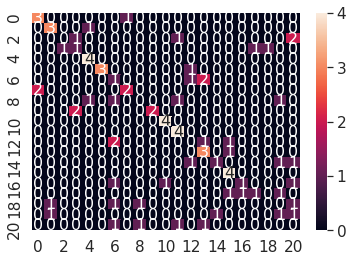

In [28]:
cm=confusion_matrix(final_pred_df['label'],final_pred_df['pred'])
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()